<a href="https://www.kaggle.com/code/mustafacihadgoktepe/heart-failure-prediction-random-forest?scriptVersionId=108006139" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [37]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [38]:
data.loc[data['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


As you can see, there is a blood pressure value equal to 0 and this is very unlikely. So I will drop this row.

In [39]:
data.drop(data.loc[data['RestingBP'] == 0].index, inplace = True)

In [40]:
data.loc[data['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


171 rows of our dataset has a 0 value of cholesterol. I think these people's blood cholesterol weren't measured because they are assumed as normal. So I will change these values with normal blood cholesterol level, for example 180.

In [41]:
data['Cholesterol'].replace(0, 180, inplace=True)

Let's look our data again.

In [42]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,232.582334,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,58.994791,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,180.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


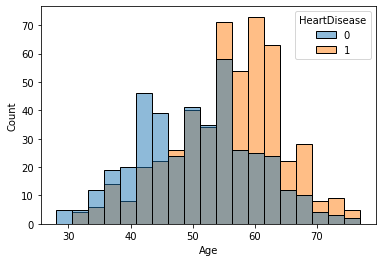

In [9]:
sns.histplot(data=data, x='Age', hue='HeartDisease');

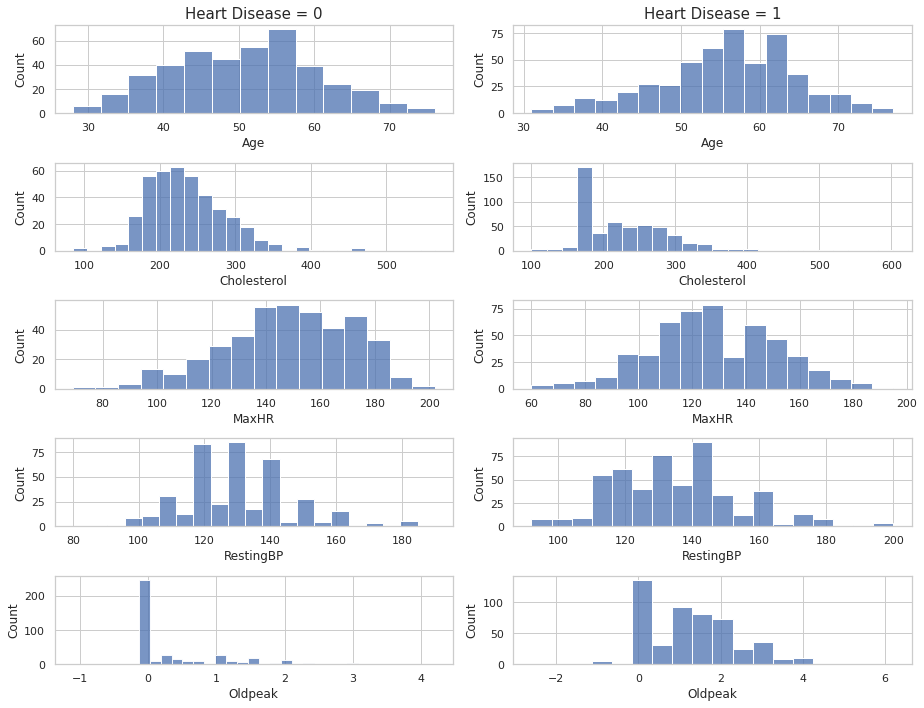

In [43]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(5,2, figsize=(13, 10), tight_layout=True)
fig_1 = sns.histplot(data=data.loc[data['HeartDisease'] == 0], x='Age', ax=ax[0, 0]);
fig_1.set_title('Heart Disease = 0', fontsize=15);
fig_2 = sns.histplot(data=data.loc[data['HeartDisease'] == 1], x='Age', ax=ax[0, 1]);
fig_2.set_title('Heart Disease = 1', fontsize=15);
sns.histplot(data=data.loc[data['HeartDisease'] == 0], x='Cholesterol', ax=ax[1, 0]);
sns.histplot(data=data.loc[data['HeartDisease'] == 1], x='Cholesterol', ax=ax[1, 1]);
sns.histplot(data=data.loc[data['HeartDisease'] == 0], x='MaxHR', ax=ax[2, 0]);
sns.histplot(data=data.loc[data['HeartDisease'] == 1], x='MaxHR', ax=ax[2, 1]);
sns.histplot(data=data.loc[data['HeartDisease'] == 0], x='RestingBP', ax=ax[3, 0]);
sns.histplot(data=data.loc[data['HeartDisease'] == 1], x='RestingBP', ax=ax[3, 1]);
sns.histplot(data=data.loc[data['HeartDisease'] == 0], x='Oldpeak', ax=ax[4, 0]);
sns.histplot(data=data.loc[data['HeartDisease'] == 1], x='Oldpeak', ax=ax[4, 1]);

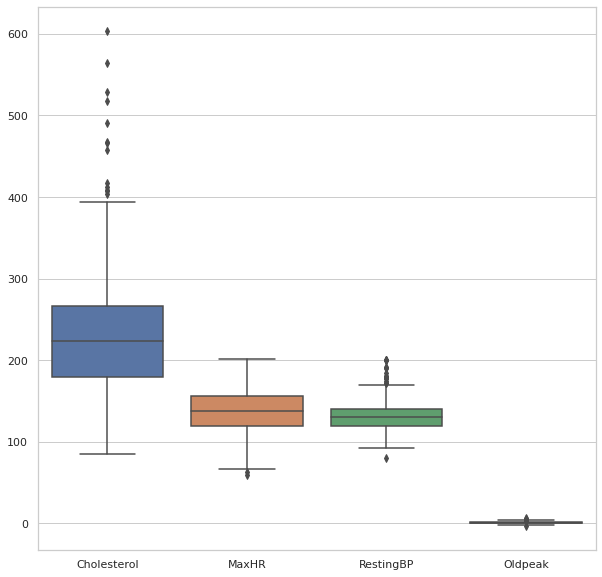

In [44]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data.loc[:, ['Cholesterol', 'MaxHR','RestingBP', 'Oldpeak']]);

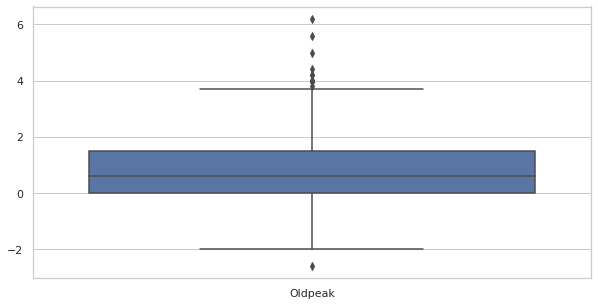

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data.loc[:, ['Oldpeak']]);

There are many outliers in our dataset, let's handle them:

In [47]:
def remove_outlier(data, col_name):
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1 - iqr*1.5
    up = q3 + iqr*1.5
    data.loc[data[col_name] < low, col_name] = low
    data.loc[data[col_name] > up, col_name] = up
    
col_list = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for col_name in col_list:
    remove_outlier(data, col_name)

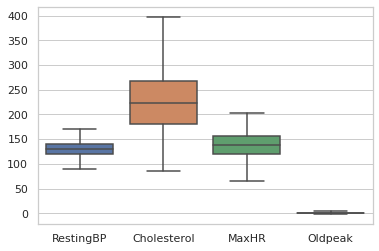

In [48]:
sns.boxplot(data=data.loc[:, col_list]);

I think it looks like better.

In [49]:
from sklearn.model_selection import train_test_split

X = data.drop('HeartDisease', axis=1)
y = pd.DataFrame(data['HeartDisease'])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, stratify=y)

In [50]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

features_num = X_train.select_dtypes(['float64', 'int64']).columns
features_cat = X_train.select_dtypes(['object']).columns

transformer_num = make_pipeline(StandardScaler())
transformer_cat = make_pipeline(OneHotEncoder()) # handle_unknown='ignore'

preprocessor = make_column_transformer((transformer_num, features_num),
                                       (transformer_cat, features_cat)
                                      )

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()
lr = LogisticRegression()
gnb = GaussianNB()
lsvc = LinearSVC()
svc = SVC()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
sgdc = SGDClassifier()
gbc = GradientBoostingClassifier()

models = [dtc, lr, gnb, lsvc, svc, rfc,  knn, sgdc, gbc]
model_name = ['Decision Tree', 'Logistic Regression', 'Gaussian Naive Bayes', 'Linear SVC', 'SVC', 'Random Forest',
              'KNN or k-Nearest Neighbors', 'Stochastic Gradient Descent', 'Gradient Boosting']

acc_scores = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc_model = round(accuracy_score(y_pred, y_valid) * 100, 2)
    acc_scores.append(acc_model)

In [52]:
models_acc = pd.DataFrame({'Model name': model_name, 'Accuracy scores': acc_scores})
models_acc.sort_values(by='Accuracy scores', ascending=False)

,Model name,Accuracy scores
4,SVC,90.76
1,Logistic Regression,89.13
5,Random Forest,88.04
3,Linear SVC,87.50
8,Gradient Boosting,86.41
6,KNN or k-Nearest Neighbors,85.87
7,Stochastic Gradient Descent,85.33
2,Gaussian Naive Bayes,84.78
0,Decision Tree,77.17


In [53]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
cv_mean_scores = []
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    cv_mean_scores.append(scores.mean()*100)

In [54]:
models_val = pd.DataFrame({'Model name': model_name, 'Cross validation mean scores': cv_mean_scores})
models_val = models_val.sort_values(by='Cross validation mean scores', ascending=False)
models_val

,Model name,Cross validation mean scores
8,Gradient Boosting,86.358836
1,Logistic Regression,85.993539
5,Random Forest,85.765539
6,KNN or k-Nearest Neighbors,85.316062
3,Linear SVC,85.266673
4,SVC,85.174106
2,Gaussian Naive Bayes,84.312428
7,Stochastic Gradient Descent,82.262914
0,Decision Tree,80.081384


In [55]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.2],
    "max_depth":[3,5,8],
    "max_features":['log2','sqrt', 'auto'],
    "n_estimators":[10, 25, 50, 100, 250, 500, 750, 1000]
    }

gbc_grid = GridSearchCV(gbc, parameters, cv=cv, scoring='accuracy')
gbc_grid.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.2],
                         'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'n_estimators': [10, 25, 50, 100, 250, 500, 750,
                                          1000]},
             scoring='accuracy')

In [58]:
gbc_grid.best_params_

{'learning_rate': 0.2,
 'max_depth': 3,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [60]:
gbc_pred = gbc_grid.predict(X_valid)
gbc_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0])

In [61]:
round(accuracy_score(gbc_pred, y_valid) * 100, 2)

86.41

In [63]:
from sklearn.metrics import classification_report

report_svc = pd.DataFrame(classification_report(y_valid, gbc_pred,
                                                output_dict=True,
                                                target_names=gbc_grid.classes_))
report_svc

,0,1,accuracy,macro avg,weighted avg
precision,0.835294,0.888889,0.86413,0.862092,0.865004
recall,0.865854,0.862745,0.86413,0.864299,0.864130
f1-score,0.850299,0.875622,0.86413,0.862961,0.864337
support,82.000000,102.000000,0.86413,184.000000,184.000000


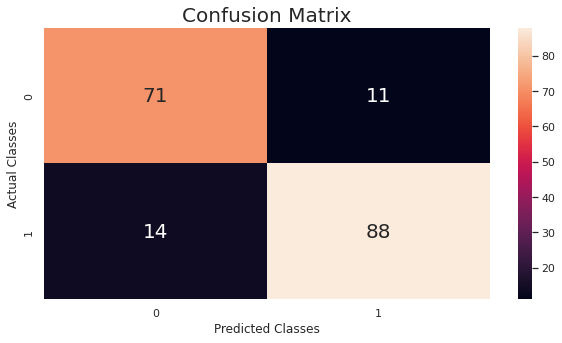

In [65]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, gbc_pred)
cm_dataframe = pd.DataFrame(cm, columns=[gbc_grid.classes_], index=[gbc_grid.classes_])

plt.figure(figsize = (10,5));
p = sns.heatmap(cm_dataframe, annot=True, fmt="d", annot_kws={"fontsize":20});
p.set_title('Confusion Matrix', fontsize=20);
p.set_xlabel('Predicted Classes');
p.set_ylabel('Actual Classes');

Thanks for reading.